# 3D dose map analysis

Use the output of the following simulation:
- Folder: exercices/
- Macros: ex2.mac, ex3.mac

Helping ressources: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path

In [30]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))

The Current Working Directory (CWD) is: 
 /Users/dsarrut/src/gate/tests/dqprm/2019/gate-exercices/exercices/py


In [31]:
# Read a sitk image
filename = os.path.join(folder,'../data/patient-2mm.mhd')
img_ct = sitk.ReadImage(filename)
print('Image size: ', img_ct.GetSize())
print('Image spacing: ', img_ct.GetSpacing())
print('Image origin: ', img_ct.GetOrigin())

Image size:  (126, 126, 111)
Image spacing:  (2.0, 2.0, 2.0)
Image origin:  (0.0, 0.0, 0.0)


In [32]:
# Convert sitk image to a numpy array
arr_ct = sitk.GetArrayFromImage(img_ct)
print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')

Array size:  (111, 126, 126)  <--- be careful to the dimension order!)


In [33]:
def show_ct(sx,sy,sz):
    fig, ax = plt.subplots(1,3, figsize=(10, 5))
    ax[0].imshow(arr_ct[sz,:,:], cmap=plt.cm.gray)
    ax[1].imshow(arr_ct[:,sx,:], cmap=plt.cm.gray)
    ax[2].imshow(arr_ct[:,:,sy], cmap=plt.cm.gray)
    
interact(show_ct, sx=(0,img_ct.GetSize()[0]), sy=(0,img_ct.GetSize()[1]), sz=(0,img_ct.GetSize()[2]));

interactive(children=(IntSlider(value=63, description='sx', max=126), IntSlider(value=63, description='sy', ma…

In [34]:
filename = os.path.join(folder, '../output/3d-pat-proton-Dose.mhd')
img_dose = sitk.ReadImage(filename)
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 2.760377e-05


In [35]:
filter = sitk.RescaleIntensityImageFilter()
filter.SetOutputMaximum(1.0)
filter.SetOutputMinimum(0.0)
img_dose = filter.Execute(img_dose)

In [36]:
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 1.0


In [37]:
def show_dose(nslice):
    plt.imshow(arr_dose[:,nslice,:], cmap=plt.cm.gray)
    plt.colorbar()
    
interact(show_dose, nslice=(0,len(arr_dose)-1));

interactive(children=(IntSlider(value=24, description='nslice', max=49), Output()), _dom_classes=('widget-inte…

In [38]:
img_resampled_dose = sitk.Resample(img_dose, img_ct, sitk.Transform(), sitk.sitkLinear, 0)

In [39]:
arr_resampled_dose = sitk.GetArrayFromImage(img_resampled_dose)
print('Image size = ', arr_resampled_dose.shape)
print('Image min and max: ',  np.amin(arr_resampled_dose), np.amax(arr_resampled_dose))

Image size =  (111, 126, 126)
Image min and max:  0.0 0.8993586


In [40]:
def show_fusion(nslice=58, opacity=0.7):
    plt.imshow(arr_ct[:,:,nslice], cmap=plt.cm.gray)
    a = arr_resampled_dose[:,:,nslice]
    b = np.ma.masked_where(a <= 0.001, a)
    plt.imshow(b, alpha=opacity, cmap=plt.cm.hot)
    plt.colorbar()
    
interact(show_fusion, nslice=(0,len(arr_ct)), opacity=(0,1,0.1));

interactive(children=(IntSlider(value=58, description='nslice', max=111), FloatSlider(value=0.7, description='…

# Part 2: 1D plot from 3D proton dose

In [41]:
filename_edep = os.path.join(str(folder), '../output/3d-pat-proton-Edep.mhd')
img_edep = sitk.ReadImage(filename_edep)
arr_edep = sitk.GetArrayFromImage(img_edep)

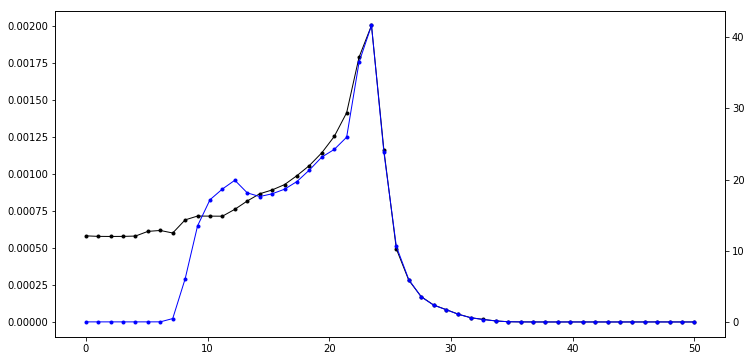

In [42]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
moy_dose=np.zeros(arr_dose.shape[0])
moy_edep=np.zeros(arr_edep.shape[0])
for i in range(arr_dose.shape[0]):
    subarr_dose=arr_dose[i,:,:]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_edep=arr_edep[i,:,:]
    moy_edep[i]=np.mean(subarr_edep)

# X values from 0 to n
# n is the number of slices
n = arr_dose.shape[0]
x = np.linspace(0, n, n)

c1 = ax.plot(x, moy_dose, 'k.-', label='deposited dose', linewidth=1)
ax2 = ax.twinx()
c2 = ax2.plot(x, moy_edep, 'b.-', label='deposited energy', linewidth=1)

# Other examples of exercices

- Plot a depth dose profile with interactive line coordinate
- Display uncertainty map
- Create another simulation with a different beam angle
- Sum and display two different dose maps (two different irradiation fields for example)